In [2]:
#obtaining top leafsubhaloid

import h5py
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm
import illustris_python as il
from tqdm import tqdm

def hdf5_to_dict(file_path):
    data_dict = {}
    
    with h5py.File(file_path, 'r') as hdf_file:
        # Recursively traverse the HDF5 file and populate the dictionary
        def traverse(name, obj):
            if isinstance(obj, h5py.Dataset):
                data_dict[name] = obj[()]  # Store dataset value in dictionary
            elif isinstance(obj, h5py.Group):
                # Create a nested dictionary for groups
                group_dict = {}
                data_dict[name] = group_dict
                
                # Recursively visit the group's children
                obj.visititems(traverse)
        
        hdf_file.visititems(traverse)
    
    return data_dict

def append_leafsubhalo_column(leafsubhaloid_df,subhaloid_df):
    fields = ['ParticleIDs']
    basePath = '/virgotng/universe/IllustrisTNG/L35n2160TNG/output'
    particleID = il.snapshot.loadSubset(basePath, 99, 'star', fields=fields)
    
    particleID_df = pd.DataFrame({'ParticleIDs': particleID})
    
    dataframe_leaf_particleid = pd.concat([leafsubhaloid_df,particleID_df], axis=1)
    
    table_v2_df = subhalo_df.merge(dataframe_leaf_particleid, left_on='ParticleIDs', right_on='ParticleIDs')
    
    return(table_v2_df)

In [2]:
file_path = '/u/vrg/StellarAssembly/output/IllustrisTNG/L35n2160TNG/unique_ids_099.hdf5'
leafsubhaloid_dict = hdf5_to_dict(file_path)

In [19]:
leafsubhaloid_df = pd.DataFrame(leafsubhaloid_dict)
leafsubhaloid_df

NameError: name 'leafsubhaloid_dict' is not defined

In [4]:
subhaloid_list = [547844, 455291, 478216, 501208, 531910, 570319, 571633, 582137, 589496, 598112, 606820, 619381, 628949]
subhaloid = subhaloid_list[0]

filename = 'tables/subhalo'
filename += str(subhaloid)
filename += '.0.csv'

subhalo_df = pd.read_csv('tables/subhalo%s.0.csv'%subhaloid)
subhalo_df.head()

,Unnamed: 0,M,x,y,z,Vx,Vy,Vz,Metallicity,U,StellarFormationTime,R,Jx,Jy,Jz,Total Energy,Circularity,ParticleIDs
0,0,53560.527344,0.029338,-0.018787,0.050264,-13.022654,39.013739,26.462412,0.946068,-248328.781250,0.280318,0.061157,-2.458153,-1.430931,0.899929,-247132.820952,0.109996,118896913475
1,1,49830.773438,-0.002267,0.034888,0.016861,-24.639224,66.195138,5.425658,2.148515,-248640.250000,0.309119,0.038815,-0.926806,-0.403136,0.709570,-246131.087295,0.086729,121068771044
2,2,49054.761719,0.156650,-0.127388,-0.002921,-35.227336,29.575495,8.363533,2.436078,-247214.484375,0.340445,0.201930,-0.979014,-1.207235,0.145455,-246121.672491,0.017779,122298304386
3,3,65541.531250,0.138966,-0.009450,0.024993,18.796672,49.023140,-20.606975,1.539409,-247484.671875,0.286720,0.141512,-1.030483,3.333459,6.990206,-245894.056589,0.854392,118459758029
4,4,56322.742188,-0.079920,0.201489,-0.046180,-23.079251,-40.952395,-19.311553,1.249086,-246930.515625,0.229181,0.221625,-5.782247,-0.477571,7.923111,-245639.172363,0.597183,114774240464


In [5]:
for index in range(len(subhaloid_list)):
    subhaloid = subhaloid_list[index]
    subhalo_df = pd.read_csv('tables/subhalo%s.0.csv'%subhaloid)
    subhalo_df_v2 = append_leafsubhalo_column(leafsubhaloid_df,subhalo_df)
    subhalo_df_v2.to_csv('tables_v2/subhalo%s.csv'%subhaloid,index=False)

IndexError: list index out of range

In [3]:
subhaloid_list = [ 455291,  478216,  501208,  531910,  547844,  570319, 571633,  582137,  589496,  598112,  606820,  619381,  628949]
subhaloid = subhaloid_list[0]

subhalo_df_v2 = pd.read_csv('tables_v2/subhalo%s.csv'%subhaloid)

In [13]:
subhalo_df_v2,subhalo_df_v2['LeafSubhaloID'][0:100]

(        Unnamed: 0              M           x           y           z  \
 0                0   53560.527344    0.029338   -0.018787    0.050264   
 1                1   49830.773438   -0.002267    0.034888    0.016861   
 2                2   49054.761719    0.156650   -0.127388   -0.002921   
 3                3   65541.531250    0.138966   -0.009450    0.024993   
 4                4   56322.742188   -0.079920    0.201489   -0.046180   
 ...            ...            ...         ...         ...         ...   
 733769      733769   67198.007812  -86.223956  -76.031285  128.463193   
 733770      733770   63961.921875 -105.229805  -69.967629  143.385221   
 733771      733771   47790.851562  -37.873371  -50.727537   59.469543   
 733772      733772  100109.351562   30.613569  102.064351   14.422995   
 733773      733773   61021.128906   27.390327  108.901380   24.880685   
 
                 Vx          Vy          Vz  Metallicity              U  \
 0       -13.022654   39.013739   2

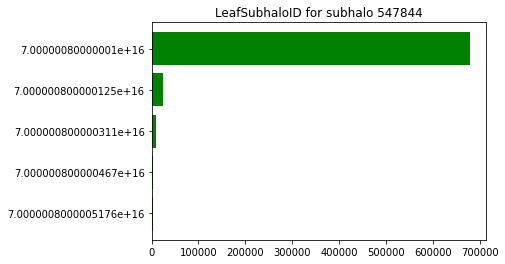

In [9]:
#SUBHALO ORIGIN TOP
design_color='green'

subhalos_origen = subhalo_df_v2['LeafSubhaloID']
subhalos_origen = subhalos_origen.astype(str)

unicos_subhalos, cuentas = np.unique(subhalos_origen, return_counts=True)

indices_ordenados = np.argsort(-cuentas)
subhalos_orden = unicos_subhalos[indices_ordenados]
cuentas_orden = cuentas[indices_ordenados]

top5_subhalos = subhalos_orden[:5]
top5_cuentas = cuentas_orden[:5]

plt.barh(top5_subhalos,top5_cuentas,color=design_color)
plt.gca().invert_yaxis()
plt.title('LeafSubhaloID for subhalo %s'%subhaloid)
plt.savefig('%s_all_particles_leafsubhaloid.png'%subhaloid)

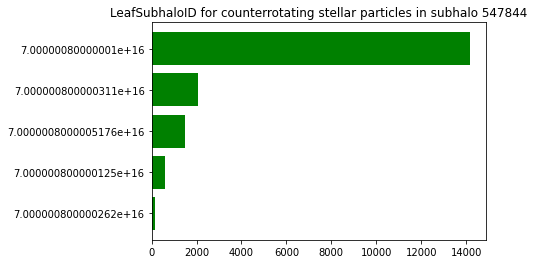

In [15]:
#SUBHALO ORIGIN TOP
design_color='green'

subhalo_df_v2_counterrotating = subhalo_df_v2.loc[subhalo_df_v2['Circularity'] <= -0.7]


subhalos_origen = subhalo_df_v2_counterrotating['LeafSubhaloID']
subhalos_origen = subhalos_origen.astype(str)

unicos_subhalos, cuentas = np.unique(subhalos_origen, return_counts=True)

indices_ordenados = np.argsort(-cuentas)
subhalos_orden = unicos_subhalos[indices_ordenados]
cuentas_orden = cuentas[indices_ordenados]

top5_subhalos = subhalos_orden[:5]
top5_cuentas = cuentas_orden[:5]

plt.barh(top5_subhalos,top5_cuentas,color=design_color)
plt.gca().invert_yaxis()
plt.title('LeafSubhaloID for counterrotating stellar particles in subhalo %s'%subhaloid)
plt.savefig('%s_counterrotating_particles_leafsubhaloid.png'%subhaloid)

In [4]:
subhaloid_list = [547844, 455291, 478216, 501208, 531910, 570319, 571633, 582137, 589496, 598112, 606820, 619381, 628949]
for index in range(len(subhaloid_list)):
    subhaloid = subhaloid_list[index]
    subhalo_df_v2 = pd.read_csv('tables_v2/subhalo%s.csv'%subhaloid)
    #SUBHALO ORIGIN TOP
    design_color='green'

    subhalos_origen = subhalo_df_v2['LeafSubhaloID']
    subhalos_origen = subhalos_origen.astype(str)

    unicos_subhalos, cuentas = np.unique(subhalos_origen, return_counts=True)

    indices_ordenados = np.argsort(-cuentas)
    subhalos_orden = unicos_subhalos[indices_ordenados]
    cuentas_orden = cuentas[indices_ordenados]

    top5_subhalos = subhalos_orden[:5]
    top5_cuentas = cuentas_orden[:5]

    plt.barh(top5_subhalos,top5_cuentas,color=design_color)
    plt.gca().invert_yaxis()
    plt.title('LeafSubhaloID for subhalo %s'%subhaloid)
    plt.tight_layout()
    plt.savefig('plots_v2/%s_all_particles_leafsubhaloid.png'%subhaloid)
    plt.clf()
    
    #counterrotating particles
    #SUBHALO ORIGIN TOP
    design_color='green'

    subhalo_df_v2_counterrotating = subhalo_df_v2.loc[subhalo_df_v2['Circularity'] <= -0.7]


    subhalos_origen = subhalo_df_v2_counterrotating['LeafSubhaloID']
    subhalos_origen = subhalos_origen.astype(str)

    unicos_subhalos, cuentas = np.unique(subhalos_origen, return_counts=True)

    indices_ordenados = np.argsort(-cuentas)
    subhalos_orden = unicos_subhalos[indices_ordenados]
    cuentas_orden = cuentas[indices_ordenados]

    top5_subhalos = subhalos_orden[:5]
    top5_cuentas = cuentas_orden[:5]

    plt.barh(top5_subhalos,top5_cuentas,color=design_color)
    plt.gca().invert_yaxis()
    plt.title('LeafSubhaloID for counterrotating stellar particles in subhalo %s'%subhaloid)
    plt.tight_layout()
    plt.savefig('plots_v2/%s_counterrotating_particles_leafsubhaloid.png'%subhaloid)
    plt.clf()

<Figure size 432x288 with 0 Axes>